# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%matplotlib notebook
%matplotlib inline


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortaleza
Processing Record 2 of Set 1 | ixtapa
Processing Record 3 of Set 1 | cuamba
Processing Record 4 of Set 1 | pelabuhanratu
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | muravlenko
Processing Record 8 of Set 1 | hradyz'k
Processing Record 9 of Set 1 | sinop
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | farafangana
Processing Record 12 of Set 1 | fort st. john
Processing Record 13 of Set 1 | pavilosta
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | glace bay
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | lesosibirsk
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | santo antonio
Processing Record 22 of Set 1 | lihue
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortaleza,-3.7227,-38.5247,27.34,83,40,5.14,BR,1699915816
1,ixtapa,20.7000,-105.2000,30.68,72,18,2.68,MX,1699916014
2,cuamba,-14.8031,36.5372,21.98,85,70,0.96,MZ,1699916061
3,pelabuhanratu,-6.9875,106.5514,25.62,91,76,1.51,ID,1699916061
4,iskateley,67.6803,53.1512,-13.32,97,100,3.58,RU,1699915550


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,27.34,83,40,5.14,BR,1699915816
1,ixtapa,20.7000,-105.2000,30.68,72,18,2.68,MX,1699916014
2,cuamba,-14.8031,36.5372,21.98,85,70,0.96,MZ,1699916061
3,pelabuhanratu,-6.9875,106.5514,25.62,91,76,1.51,ID,1699916061
4,iskateley,67.6803,53.1512,-13.32,97,100,3.58,RU,1699915550


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

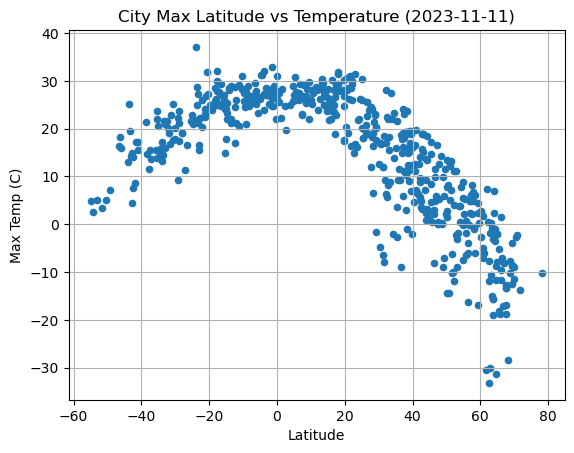

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',x='Lat',y='Max Temp',grid=True, 
                  title='City Max Latitude vs Temperature (2023-11-11)',
                  ylabel='Max Temp (C)', xlabel='Latitude')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

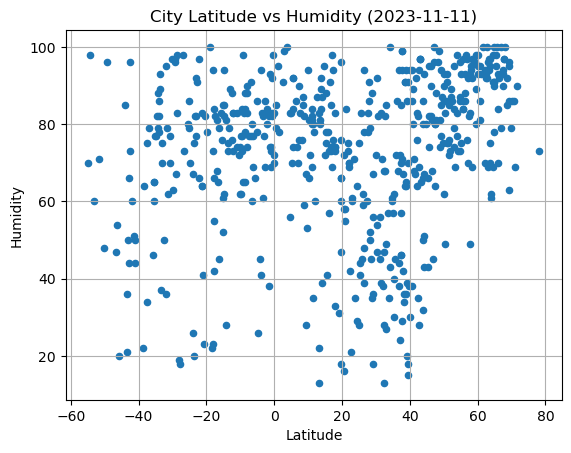

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter',x='Lat',y='Humidity',grid=True, 
                  title='City Latitude vs Humidity (2023-11-11)', xlabel='Latitude')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

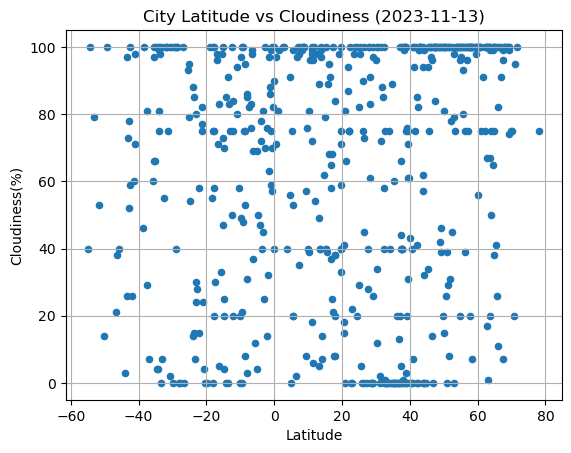

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',x='Lat',y='Cloudiness',grid=True, 
                  title='City Latitude vs Cloudiness (2023-11-13)',
                  ylabel='Cloudiness(%)', xlabel='Latitude')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

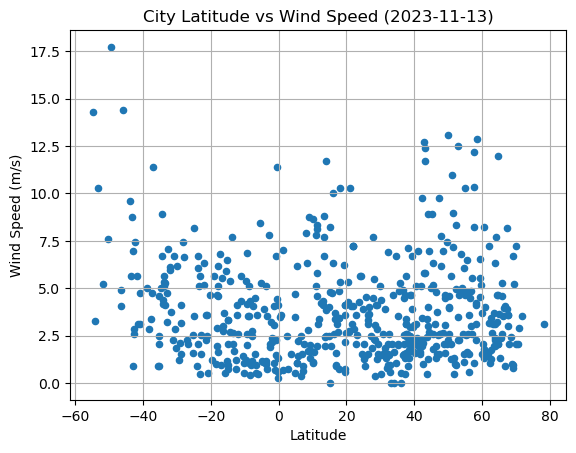

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',x='Lat',y='Wind Speed',grid=True, 
                  title='City Latitude vs Wind Speed (2023-11-13)',
                  ylabel='Wind Speed (m/s)', xlabel='Latitude')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_regr_plt(data, x, y):
    # Scatter plot
    plt.scatter(data[x], data[y])
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
    line = slope * data[x] + intercept
    
    plt.text(x=0,y=0,s=f' y = {slope:.2f}x + {intercept:.2f}',fontsize=15,color='red')
    plt.plot(data[x], line, color='red')
    
    plt.xlabel('Latitude')
    plt.ylabel(y)
    
    print(f' The r-value is: {r_value}')


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ixtapa,20.7000,-105.2000,30.68,72,18,2.68,MX,1699916014
4,iskateley,67.6803,53.1512,-13.32,97,100,3.58,RU,1699915550
5,longyearbyen,78.2186,15.6401,-10.09,73,75,3.09,SJ,1699916063
6,muravlenko,63.7898,74.5230,-15.72,95,67,1.94,RU,1699916064
7,hradyz'k,49.2346,33.1361,6.01,77,39,4.49,UA,1699916065


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,27.34,83,40,5.14,BR,1699915816
2,cuamba,-14.8031,36.5372,21.98,85,70,0.96,MZ,1699916061
3,pelabuhanratu,-6.9875,106.5514,25.62,91,76,1.51,ID,1699916061
10,farafangana,-22.8167,47.8333,22.25,91,28,2.55,MG,1699915589
13,adamstown,-25.0660,-130.1015,22.86,86,95,8.17,PN,1699915955


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is: -0.8563775720297898


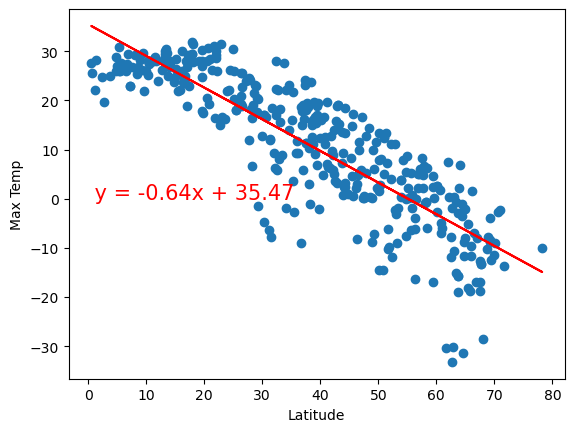

In [16]:
# Linear regression on Northern Hemisphere
lin_regr_plt(northern_hemi_df, 'Lat', 'Max Temp')

 The r-value is: 0.787458212242487


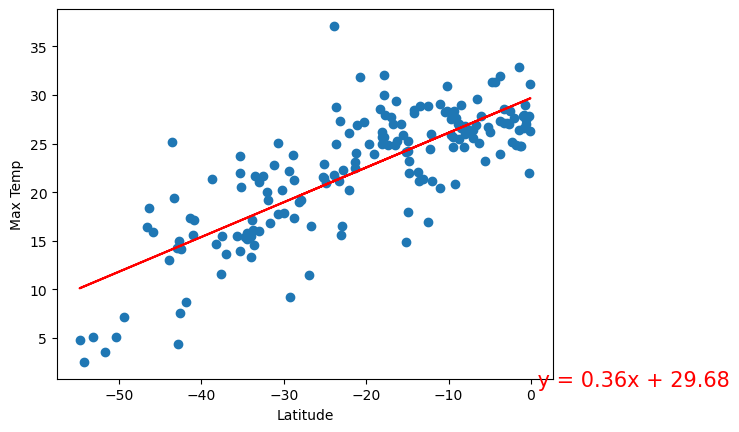

In [17]:
# Linear regression on Southern Hemisphere
lin_regr_plt(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [18]:
#For this dataset: the greater the absolue value of the latitude(the further away from zero), the greater the maximum temperature. 
#There appears to be a strong negative correlation between the absolute value of the latitude and the maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

 The r-value is: 0.2943709968295038


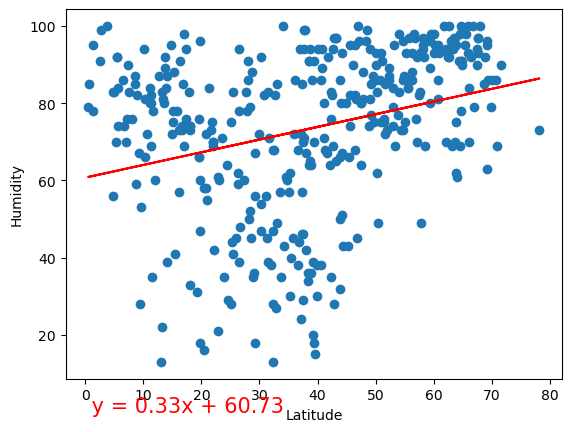

In [19]:
# Northern Hemisphere
lin_regr_plt(northern_hemi_df, 'Lat', 'Humidity')

 The r-value is: 0.2255959474380297


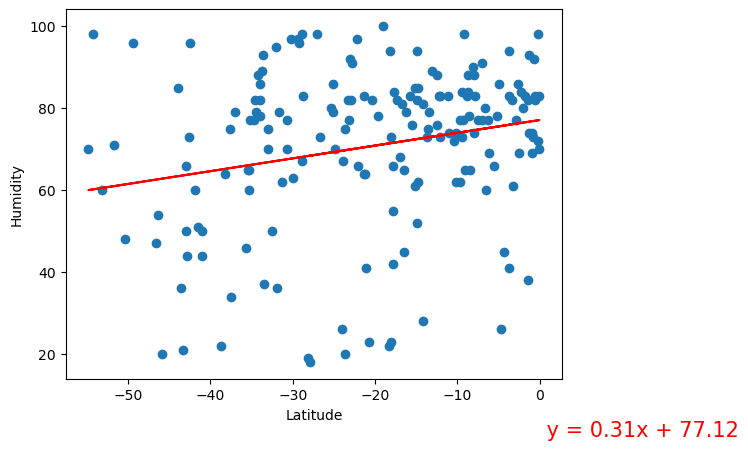

In [20]:
# Southern Hemisphere
lin_regr_plt(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [21]:
#There appears to be a weak positive correlation between humidity level and latitude in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

 The r-value is: 0.19337862741403997


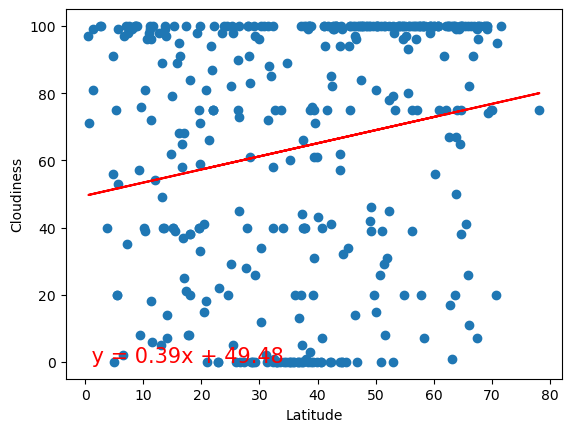

In [22]:
# Northern Hemisphere
lin_regr_plt(northern_hemi_df, 'Lat', 'Cloudiness')

 The r-value is: 0.02019169613530774


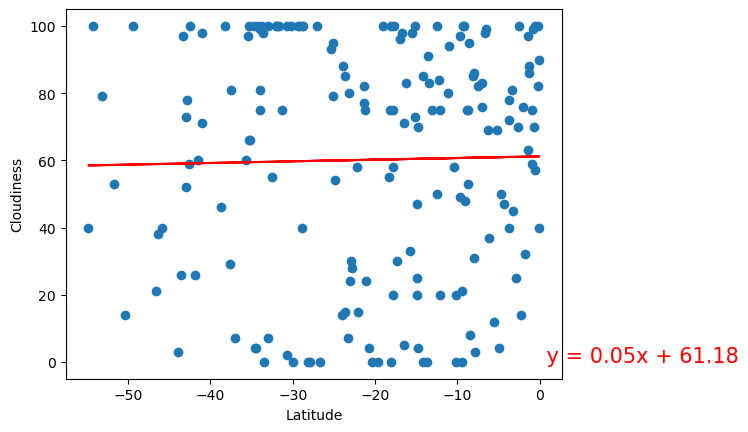

In [23]:
# Southern Hemisphere
lin_regr_plt(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [24]:
#There appears to be a weak positive correlation between latitude and cloudiness in the northern hemisphere and no correlation between the two in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

 The r-value is: 0.05984677817235658


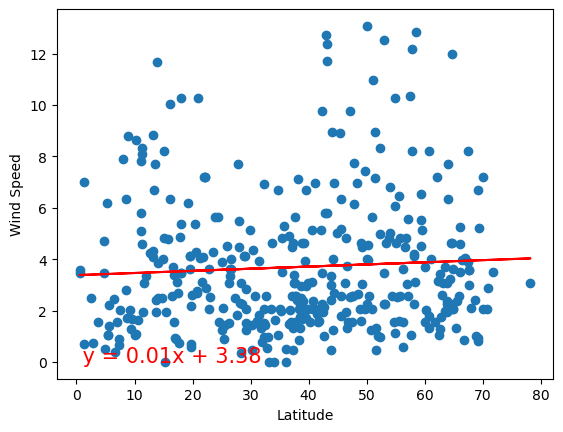

In [25]:
# Northern Hemisphere
lin_regr_plt(northern_hemi_df, 'Lat', 'Wind Speed')

 The r-value is: -0.42205483720208203


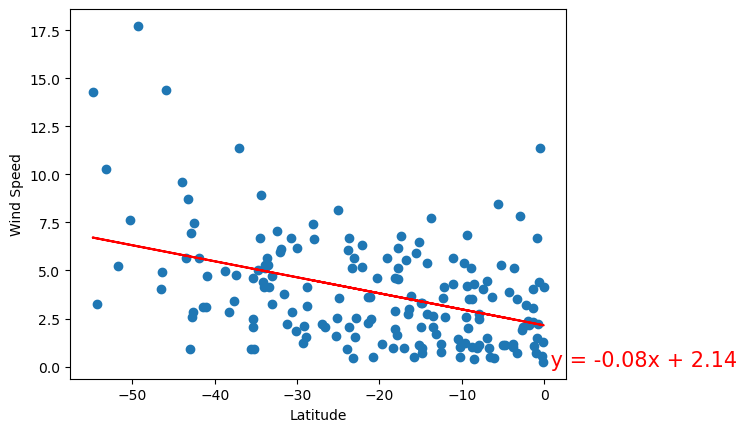

In [26]:
# Southern Hemisphere
lin_regr_plt(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [27]:
#In the Southern Hemisphere there appears to be a weak negative correlation between wind speed and latitude.
#In the Northern Hemisphere there appears to be no correlation between wind speed and latitude.